In [1]:
from importlib import reload
import os
from time import time
import copy

import sys
sys.path.append('/homefs/home/wongfanc/density-ratio-estimation/')

import numpy as np
import scipy as sc
import pandas as pd
from sklearn.decomposition import PCA
import random

import torch
print(torch.cuda.is_available())

import pprint
import editdistance

import utils
import tdre
import shifts
import designdata as dd
import calibrate as cal

import flexs
import flexs.utils.sequence_utils as s_utils

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

True


2024-01-30 00:30:23.633332: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 00:30:23.633409: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 00:30:23.634706: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 00:30:23.643179: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 00:30:25.606533: W tensorflow/compiler/tf2

<IPython.core.display.Javascript object>

In [2]:
from flexs.landscapes import GPGFPBrightness, BertGFPBrightness
gp = GPGFPBrightness(load=True, c=10)
bert = BertGFPBrightness()

/homefs/home/wongfanc/miniconda3/envs/torchenv/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [6]:
n_mutation = 5
p_mut = n_mutation / len(bert.gfp_wt_sequence)
n_mutant = 10
wt_mutants = [s_utils.generate_random_mutant(bert.gfp_wt_sequence, p_mut, s_utils.AAS) for _ in range(n_mutant)]

In [2]:
from flexs.landscapes import GPGFPBrightness, BertGFPBrightness
gp = GPGFPBrightness(load=True, c=0)  # to change HPs, need to retrain
rand_idx = np.random.choice(1000, 10)
predtrain_n = gp.predict(gp.X_[rand_idx], print_every=2000)
predtrain_n

1.0
Number of Kstar elements filled: 2000 / 10000
Number of Kstar elements filled: 4000 / 10000
Number of Kstar elements filled: 6000 / 10000
Number of Kstar elements filled: 8000 / 10000
Number of Kstar elements filled: 10000 / 10000


array([[7.8666957 ],
       [7.86669495],
       [7.86669535],
       [7.86669695],
       [7.86669483],
       [7.86669608],
       [7.86669518],
       [7.86669511],
       [7.86669763],
       [7.86669552]])

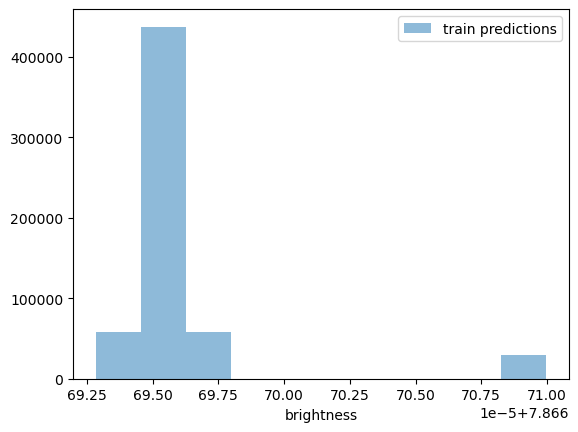

In [5]:
# plt.hist(gp.y_.flatten(), alpha=0.5, density=True, label='train labels');
plt.hist(predtrain_n.flatten(), alpha=0.5, density=True, label='train predictions');


# ys = gp.get_fitness([bert.gfp_wt_sequence, bert.starts['ed_10_wt'], bert.starts['ed_18_wt']])
# plt.axvline(ys[0], linestyle='--', label='WT')
# plt.axvline(ys[1], linestyle='--', label='ed_10_wt')
# plt.axvline(ys[2], linestyle='--', label='ed_18_wt')

# plt.hist(ytest_n, alpha=0.5, density=True, label='{}-mutants of GFP WT'.format(n_mutation))

plt.legend()
plt.xlabel('brightness');